# Project Title (ML Project: Predict Bank Product Uptake)

* We want to predict customers that would or would not subscribe to a product
* We would create 4 different ML algorithms such as Decision Tree, Random Forest, Logistic Regression, KNN
* We would evaluate the model using accuracy, precision and recall
* We would display the confusion matric to reveal the classsification report

In [1]:

#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import other libraries....

# Data Inspection

* Load the data set
* Within a markdown cell, give a description of the dataset:
    * what is the source of the data? bank2.csv
    * how many rows and columns? 4521 rows , 17 columns
    * does it have missing values? there are no columns with missing values
    * any other significant details code data.info() provides details of the data types of each column

In [3]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters
#data = pd.read_csv('bank.csv',sep=';', header=None)
data = pd.read_csv('bank2.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.shape

(4521, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [17]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [18]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#set values in the first row as columns to the data frame
#data have been cleaned via excel so no need
#data.rename(columns = data.iloc[0],inplace=True)
data.head(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [7]:
#delete the first row 
#data have been cleaned via excel so no need
#data.drop(0,inplace=True)
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [8]:
#inspect the data
data.notna().sum()


age          4521
job          4521
marital      4521
education    4521
default      4521
balance      4521
housing      4521
loan         4521
contact      4521
day          4521
month        4521
duration     4521
campaign     4521
pdays        4521
previous     4521
poutcome     4521
y            4521
dtype: int64

In [9]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Data Cleansing

In this markdown cell, mention the data cleaning steps you will take. Some of your steps may include
* Handling missing values (NaN)
* Replacing text
* Removing or deleting unnecessary records

<AxesSubplot:>

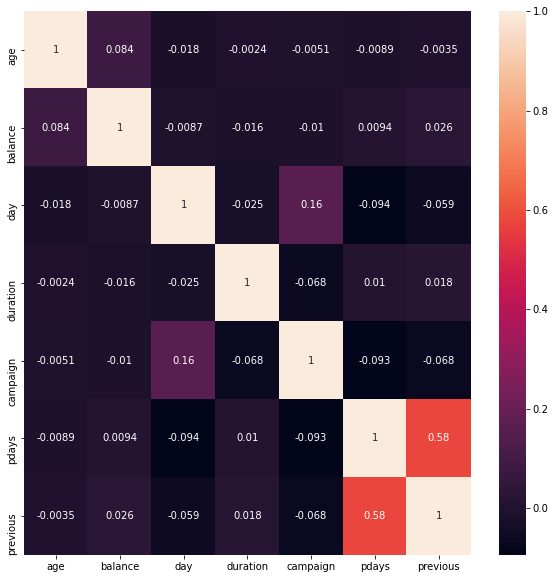

In [10]:
# this helps us to see the relationship that exist
#import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [39]:
#replace all rows with the value yes and no with 0 and 1
data.replace({'yes':0,'no':1},inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1,1787,1,1,cellular,19,oct,79,1,-1,0,unknown,1
1,33,services,married,secondary,1,4789,0,0,cellular,11,may,220,1,339,4,failure,1
2,35,management,single,tertiary,1,1350,0,1,cellular,16,apr,185,1,330,1,failure,1
3,30,management,married,tertiary,1,1476,0,0,unknown,3,jun,199,4,-1,0,unknown,1
4,59,blue-collar,married,secondary,1,0,0,1,unknown,5,may,226,1,-1,0,unknown,1


In [27]:
#data cleasning cells

# Data Visualization

In this section, visualize import relationships in the data set.

## Univariate Analysis

Create charts where you plot only one variable (column) at a time. 

You can use simple charts like histograms and boxplots.

> For example, use a histogram to plot an age distribution column (if you have one).

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

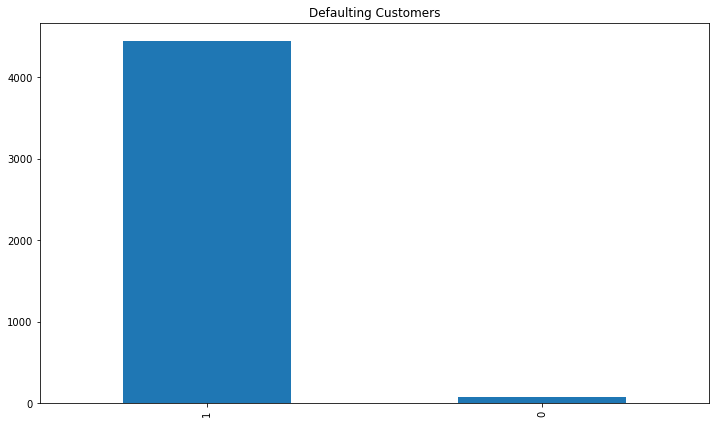

In [40]:
# Code to show nos of Customers with loan in default 
# less than 100 customers had loan in default

df=data['default'].value_counts()
#df.plot.barh()
df.plot.bar(figsize=(12,7))
plt.title('Defaulting Customers')
plt.show()

Text(0.5, 1.0, 'Marital Status Customers')

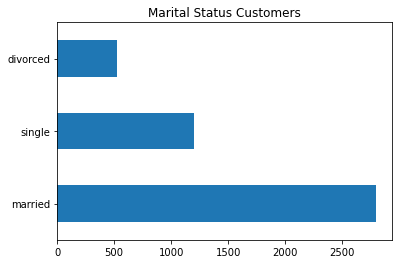

In [41]:
#univariate analysis cells
#Your code here
#Code shows us the Marital status  of customers 
#Most Customers were married
wc=data['marital'].value_counts()
wc.plot.barh()
plt.title('Marital Status Customers')

<Figure size 1080x576 with 0 Axes>

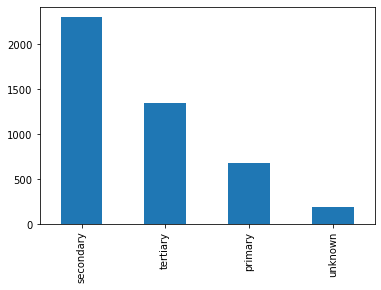

<Figure size 1080x576 with 0 Axes>

In [16]:
#Code shows us the educational level of customers 
#Most customers were educated to Secondary Level with the list educational level being primary
ed=data['education'].value_counts()
ed.plot.bar()
#this is to make the image larger
plt.figure(figsize=(15,8)) 

In [ ]:
#univariate analysis cells


In [35]:
recency = data.day.max()
recency

31

## Bivariate Analysis

Create charts where you plot only two variables at a time on a chart. 

You can use visuals like bar charts, boxplots, scatter plots and so on.

> You can plot variables like age against number of purchases, etc

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

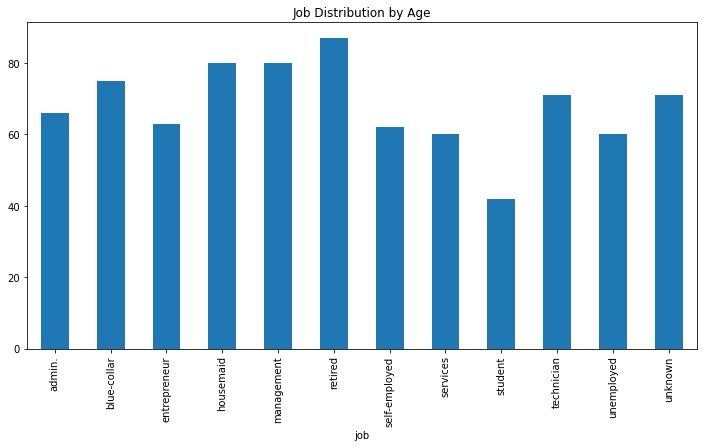

In [118]:
# Code grouped Jobs by age
# Oldest were retired , followed by management and housemaid whilst the youngest were students
aj = data.groupby('job').age.max()
aj.plot.bar(figsize=(12,6))

plt.title('Job Distribution by Age')
plt.show()

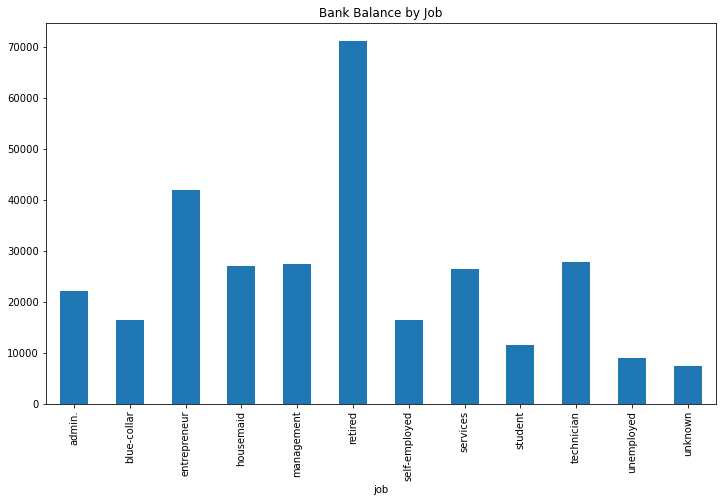

In [17]:
#Code to group Customer Balance by their jobs
# The code reveals Retred had the highest balance  followed by enterpreneurs and the unemployed had the lowest balance
jb = data.groupby('job').balance.max()
jb.plot.bar(figsize=(12,7))

plt.title('Bank Balance by Job')
plt.show()

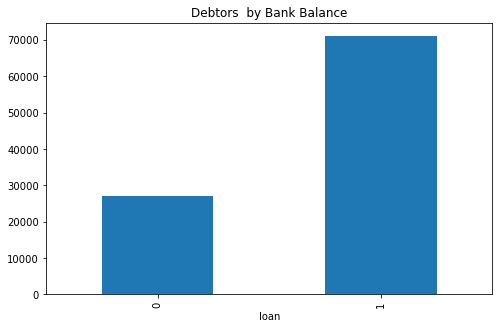

In [20]:
#Code to group Customer who had existing loan and compared it to their bank Balance 
# The code reveals the balance of those without personal loans was higher than those with loans

lb = data.groupby('loan').balance.max()
lb.plot.bar(figsize=(8,5))

plt.title('Debtors  by Bank Balance')
plt.show()

In [40]:
recency = data.groupby('marital').duration.max()
recency.head()

marital
divorced    2456
married     3025
single      1994
Name: duration, dtype: int64

In [41]:
# We calculate recency days by substracting each date from the max last contact duration in the dataset
# we change the details of recency to display the above
recency = recency-data.duration.max()
recency.head()

marital
divorced    -569
married        0
single     -1031
Name: duration, dtype: int64

In [42]:
# we create a code below to rename the series as it 'Recency'
recency.rename('Recency',inplace=True)

marital
divorced    -569
married        0
single     -1031
Name: Recency, dtype: int64

In [52]:
#create a new DataFrame called 'RFM' using the recency series as the data for this dataframe.
#refer to your pandas class notes, or pop out documentation, to refresh your memory on how to create a dataframe from 
#another object

RFM = pd.DataFrame(data=recency)

#check what you've created
RFM.head(2)

,Recency
marital,
divorced,-569
married,0


In [53]:
#pop out CustomerID to become a column. 
#we don't want it to be an index because we'll play with indexes during clustering
RFM.reset_index(inplace=True)
RFM.head(2)

,marital,Recency
0,divorced,-569
1,married,0


In [51]:
RFM.describe()

,Recency,Frequency_x,Frequency_y
count,3.000000,3.000000,3.000000
mean,-533.333333,1507.000000,1507.000000
std,516.424567,1166.032161,1166.032161
min,-1031.000000,528.000000,528.000000
25%,-800.000000,862.000000,862.000000
50%,-569.000000,1196.000000,1196.000000
75%,-284.500000,1996.500000,1996.500000
max,0.000000,2797.000000,2797.000000


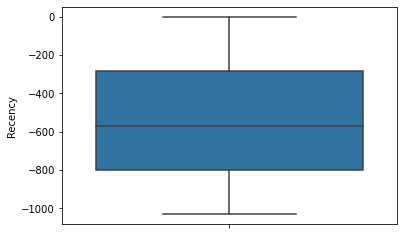

In [54]:
#plot Recency data with boxplot
sns.boxplot(y='Recency',data=RFM)

plt.show()

In [56]:
#bivariate analysis cells
frequency = data.groupby('marital').marital.count()

In [57]:
#bivariate analysis cells
frequency.rename('Frequency',inplace=True)

marital
divorced     528
married     2797
single      1196
Name: Frequency, dtype: int64

In [58]:
#bivariate analysis cells
RFM = RFM.merge(frequency,on='marital')

RFM.head(3)

,marital,Recency,Frequency
0,divorced,-569,528
1,married,0,2797
2,single,-1031,1196


In [59]:
RFM.describe()

,Recency,Frequency
count,3.000000,3.000000
mean,-533.333333,1507.000000
std,516.424567,1166.032161
min,-1031.000000,528.000000
25%,-800.000000,862.000000
50%,-569.000000,1196.000000
75%,-284.500000,1996.500000
max,0.000000,2797.000000


(0.0, 3000.0)

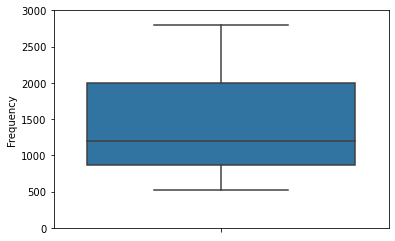

In [62]:
sns.boxplot(y='Frequency',data=RFM)
plt.ylim(0,3000)

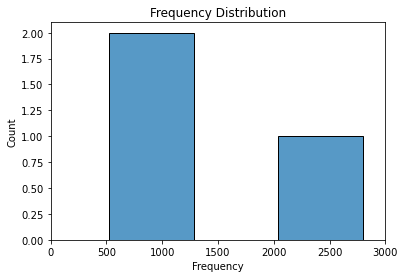

In [63]:
sns.histplot(data=RFM['Frequency'])
plt.title('Frequency Distribution')
plt.xlim(0,3000)
plt.show()

## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


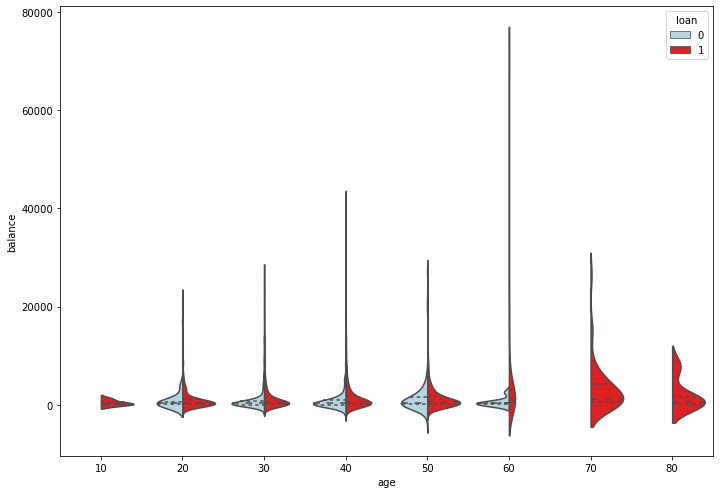

In [54]:
# in this code we created a variable using lambda function to create a distibution for the age range
#We used the age range variable called age group , bank balance to test if these factors affeted the decision to take loans
# We discovered that the age range of those who took loans were in the age range of 20 to 50yrs and their bank balance 
#was below 4000
age_group = data.age.map(lambda age:10*(age//10))
sns.axes_style(style=None)
fig, ax= plt.subplots()
fig.set_size_inches(11.7,8.27)
abl = sns.violinplot(age_group,'balance', hue='loan', data=data, split=True, inner='quartile', size=25, 
                     palette=['lightblue','red'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


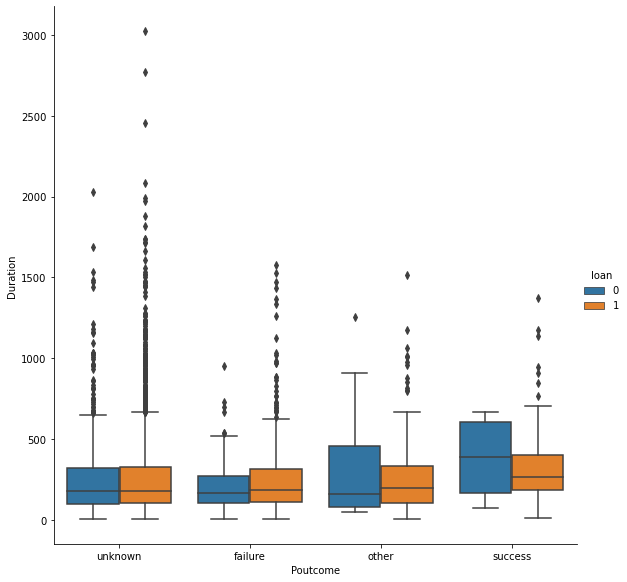

In [119]:
# Code provides outcomes based on duration of call and whether they had existing personalloan based 
# We discovered that generally those withexisting personal loan had sucessful outcome 
# However the duration of the call had no real effect on whether they responded to the campaign or npt
sns.axes_style(style='ticks')
k = sns.factorplot('poutcome','duration','loan',data=data, kind='box', size=8)
k.set_axis_labels('Poutcome','Duration')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


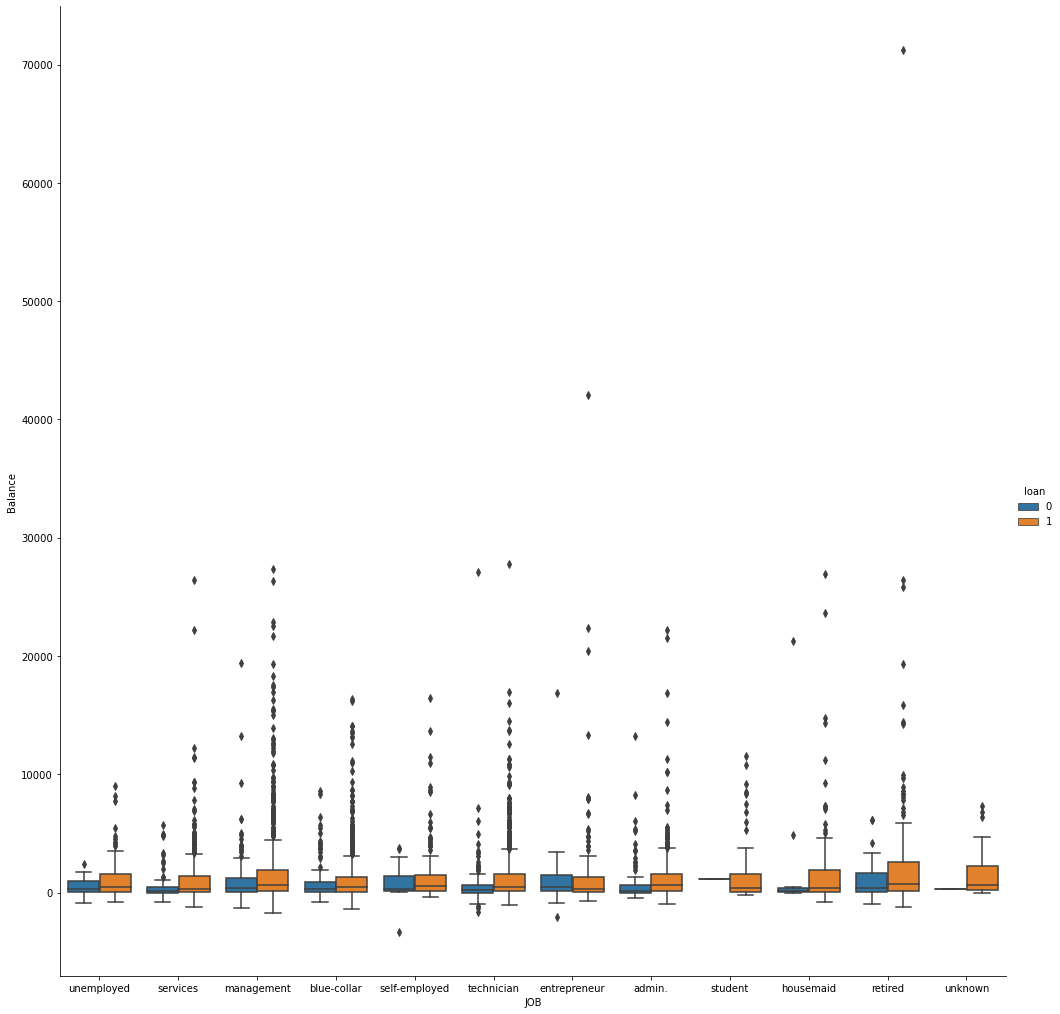

In [120]:
# Code provides dyistribution of those with personalloan based on their job and bank balance
# We discovered that generally those with lower bank balance across the different job groups had personal loans 
# when compared with members of their group who had a higher bank balance 
sns.axes_style(style='ticks')
g= sns.factorplot('job','balance','loan',data=data, kind='box', size=14)
g.set_axis_labels('JOB','Balance')

In [ ]:
#multivariate analysis cells


In [ ]:
#multivariate analysis cells


In [ ]:
#multivariate analysis cells


# Summary of Findings

In this markdown cell, summarize your list of findings.

1. Most people with large bank balance did not take loans
2. Most people in the Age range of 30 to 50 were more likely to take loan so could be the main target group
3. The Job of customers affected their bank balnce and their posibility to take on bank product
4. The risk management is very good as most customers did not  default on their loan

# Modelling

In this section, you will train and evaluate your models


## Select Target

In [56]:
#1. select categorical variables
#replace pass with your code

categorical =['job', 'marital', 'education', 'contact', 'month', 'poutcome']
categorical
#census_data[categorical]

['job', 'marital', 'education', 'contact', 'month', 'poutcome']

In [58]:
#create pd.get_dummies() for one hot encoding
#we display the first  rows to view the encoding

categories_dummies = pd.get_dummies(data[categorical])

#view what you have done
categories_dummies.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [59]:
#join the encoded variables back to the main dataframe using pd.concat()
# we created a variable called data1 and passed into it both data and categories_dummies as a list of their names
#we displayed the first four rows to view the details and then the rows and columns

data1 = pd.concat([data, categories_dummies], axis=1)

#check what you have done
print(data1.shape)
data1.head()

(4521, 55)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,primary,1,1787,1,1,cellular,19,...,0,0,0,0,1,0,0,0,0,1
1,33,services,married,secondary,1,4789,0,0,cellular,11,...,0,0,1,0,0,0,1,0,0,0
2,35,management,single,tertiary,1,1350,0,1,cellular,16,...,0,0,0,0,0,0,1,0,0,0
3,30,management,married,tertiary,1,1476,0,0,unknown,3,...,1,0,0,0,0,0,0,0,0,1
4,59,blue-collar,married,secondary,1,0,0,1,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [60]:
#we removed the initial categorical columns now that we have encoded them
# we used the list called categorical and delete all the initially selected columns at once
#Create a new variable name census_data2 and place the code to delete the variable categorical into it
data2 = data1.drop(categorical, axis=1)
data2
data2.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1,1787,1,1,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,1,4789,0,0,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,1,1350,0,1,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,1,1476,0,0,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
4,59,1,0,0,1,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [61]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   default              4521 non-null   int64
 2   balance              4521 non-null   int64
 3   housing              4521 non-null   int64
 4   loan                 4521 non-null   int64
 5   day                  4521 non-null   int64
 6   duration             4521 non-null   int64
 7   campaign             4521 non-null   int64
 8   pdays                4521 non-null   int64
 9   previous             4521 non-null   int64
 10  y                    4521 non-null   int64
 11  job_admin.           4521 non-null   uint8
 12  job_blue-collar      4521 non-null   uint8
 13  job_entrepreneur     4521 non-null   uint8
 14  job_housemaid        4521 non-null   uint8
 15  job_management       4521 non-null   uint8
 16  job_retired          452

In [62]:
#We set our target
#we display the first four rows
y = data2.y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

## Select Features

In [63]:
# here we set the features by seleting the attributes to be used
features = data2.drop(["y"],axis=1)
features.shape

(4521, 48)

In [64]:
#we set our x the dependent variables
#we display the first four lines
X = features
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1,1787,1,1,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,1
1,33,1,4789,0,0,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,1,1350,0,1,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,1,1476,0,0,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,1
4,59,1,0,0,1,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [66]:
#we import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

## Train Test Split

In [67]:
#split into training and validation sets using a 40% split ratio
#X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.4)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4)

In [86]:
#we display the first four rows of oor training and test data set
print('\n',X_train.head(2))
print('\n',X_test.head(2))
print('\n',y_train.head(2))
print('\n',y_test.head(2))


       age  default  balance  housing  loan  day  duration  campaign  pdays  \
1114   36        1      487        1     0   11       268         3     -1   
135    33        1        0        1     1   28       236        10     -1   

      previous  ...  month_jun  month_mar  month_may  month_nov  month_oct  \
1114         0  ...          0          0          0          0          0   
135          0  ...          0          0          0          0          0   

      month_sep  poutcome_failure  poutcome_other  poutcome_success  \
1114          0                 0               0                 0   
135           0                 0               0                 0   

      poutcome_unknown  
1114                 1  
135                  1  

[2 rows x 48 columns]

       age  default  balance  housing  loan  day  duration  campaign  pdays  \
3629   31        1      401        1     1   14        96         3     -1   
2296   32        1     1905        0     1   16       709 

## Import ML algorithms and initialize them

In [68]:
# We initialize logistic regression
#we import the library
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()


In [69]:
#we fit the training data set
LR.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
#we set out test data
LR_preds = LR.predict(X_test)

In [71]:
#we import the accuracy library to test the level of accuracy of the model
from sklearn.metrics import accuracy_score

In [72]:
#we print out the accuracy score
print(accuracy_score(LR_preds,y_test))

0.8955223880597015


In [73]:
#we import the classification library to view the recall and precision value
from sklearn.metrics import classification_report
#print classification report
print(classification_report(LR_preds, y_test))

              precision    recall  f1-score   support

           0       0.26      0.62      0.36        87
           1       0.98      0.91      0.94      1722

    accuracy                           0.90      1809
   macro avg       0.62      0.77      0.65      1809
weighted avg       0.94      0.90      0.92      1809



In [75]:
#we import the confusion matrix library to view the performance of the classification algorithm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

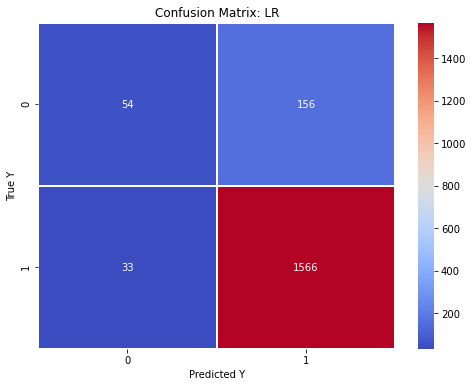

In [77]:
cmLR = confusion_matrix(y_test, LR_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cmLR,
cmap='coolwarm',
linecolor='white',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: LR')
plt.ylabel('True Y')
plt.xlabel('Predicted Y')
plt.show()

In [80]:
# We initialize k neighbors
#we import the library 
from sklearn.neighbors import KNeighborsClassifier

In [81]:
#k_model = KNeighborsClassifier()
KN = KNeighborsClassifier()

In [82]:
KN.fit(X_train,y_train)


KNeighborsClassifier()

In [83]:
k_preds=KN.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score

In [96]:
print(accuracy_score(k_preds,y_test))

0.882808181315644


In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_test, k_preds))

              precision    recall  f1-score   support

           0       0.39      0.18      0.24       210
           1       0.90      0.96      0.93      1599

    accuracy                           0.87      1809
   macro avg       0.65      0.57      0.59      1809
weighted avg       0.84      0.87      0.85      1809



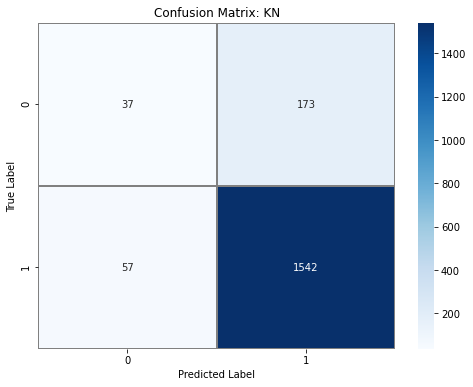

In [88]:
cm_ = confusion_matrix(y_test, k_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_,
cmap='Blues',
linecolor='grey',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: KN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Train and Test the models

In [90]:
#TODO: initialize decision tree
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier()


In [91]:
DC.fit(X_train,y_train)

DecisionTreeClassifier()

In [92]:
DC_preds2 = DC.predict(X_test)

In [93]:
print('Actual Y:', y.head().tolist())
print('Predicted Y:', DC_preds2[:5])

Actual Y: [1, 1, 1, 1, 1]
Predicted Y: [1 1 1 1 1]


In [94]:
print(accuracy_score(DC_preds2,y_test))

0.8700939745715865


In [95]:
print(classification_report(y_test, DC_preds2))

              precision    recall  f1-score   support

           0       0.44      0.41      0.43       210
           1       0.92      0.93      0.93      1599

    accuracy                           0.87      1809
   macro avg       0.68      0.67      0.68      1809
weighted avg       0.87      0.87      0.87      1809



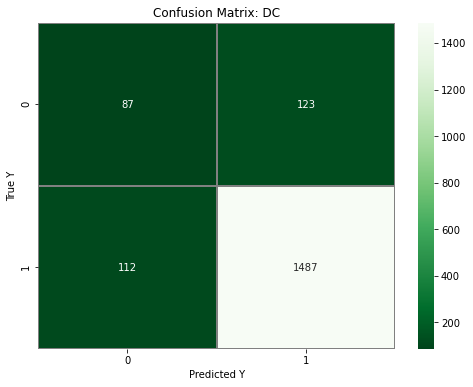

In [98]:
cmDC = confusion_matrix(y_test, DC_preds2)
plt.figure(figsize=(8, 6))
sns.heatmap(cmDC,
cmap='Greens_r',
linecolor='grey',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: DC')
plt.ylabel('True Y')
plt.xlabel('Predicted Y')
plt.show()

## Interpret Results

Interpret the results by assessing accuracy score, precision score and recall score

In [100]:
#TODO: initialize random forest
from sklearn.ensemble import RandomForestClassifier 
RF = RandomForestClassifier()
RF

RandomForestClassifier()

In [101]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
RF_preds = RF.predict(X_test)

In [103]:
print(accuracy_score(RF_preds,y_test))

0.9010503040353787


In [104]:
print(classification_report(RF_preds,y_test))

              precision    recall  f1-score   support

           0       0.24      0.72      0.36        69
           1       0.99      0.91      0.95      1740

    accuracy                           0.90      1809
   macro avg       0.61      0.82      0.65      1809
weighted avg       0.96      0.90      0.92      1809



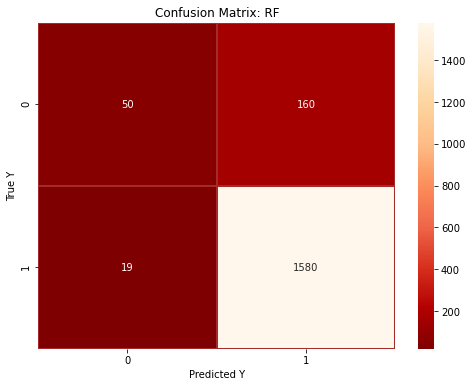

In [108]:
cmRF = confusion_matrix(y_test, RF_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cmRF,
cmap='OrRd_r',
linecolor='brown',
linewidths=1,
annot=True,
fmt='d')
plt.title('Confusion Matrix: RF')
plt.ylabel('True Y')
plt.xlabel('Predicted Y')
plt.show()

In [109]:
#create list of your model names
models = [LR,KN,DC,RF]
models

[LogisticRegression(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier()]

In [110]:
#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    #print(classification_report(prediction,y_valid)) #use this later
    

In [111]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For LogisticRegression, Accuracy score is 0.8955223880597015 


For KNeighborsClassifier, Accuracy score is 0.8728579325594251 


For DecisionTreeClassifier, Accuracy score is 0.8684355997788834 


For RandomForestClassifier, Accuracy score is 0.8944168048645661 



In [112]:
#create function to train a model and evaluate accuracy
def trainer(models,X_train,y_train,X_test,y_test):
    #fit your model
    models.fit(X_train,y_train)
    #predict on the fitted model
    prediction = models.predict(X_test)
    #print evaluation metric
    print('\nFor {}, classification_report is {} \n'.format(models.__class__.__name__,classification_report(prediction,y_test)))
    #print(classification_report(prediction,y_valid)) #use this later
    

In [121]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



For LogisticRegression, classification_report is               precision    recall  f1-score   support

           0       0.24      0.59      0.34        81
           1       0.98      0.91      0.94      1728

    accuracy                           0.90      1809
   macro avg       0.61      0.75      0.64      1809
weighted avg       0.95      0.90      0.92      1809
 


For KNeighborsClassifier, classification_report is               precision    recall  f1-score   support

           0       0.21      0.45      0.29        95
           1       0.97      0.91      0.94      1714

    accuracy                           0.88      1809
   macro avg       0.59      0.68      0.61      1809
weighted avg       0.93      0.88      0.90      1809
 


For DecisionTreeClassifier, classification_report is               precision    recall  f1-score   support

           0       0.41      0.42      0.41       202
           1       0.93      0.93      0.93      1607

    accuracy          

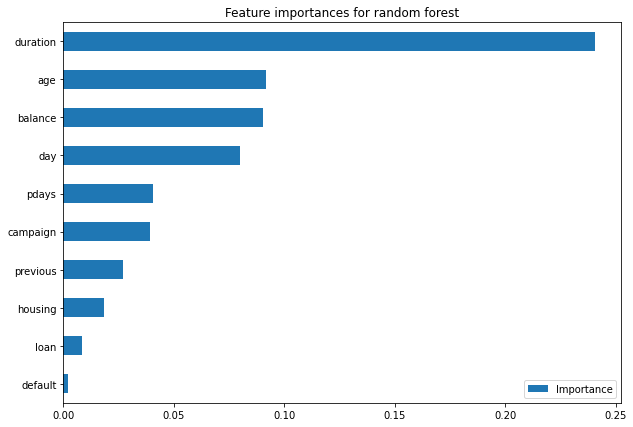

In [121]:
#get feature importances
RF_importances = pd.DataFrame(data = RF.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh(figsize=(10, 7))

plt.title('Feature importances for random forest')
plt.show()
#plt.figure(figsize=(25, 20))

In [114]:
#get these top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

array(['default', 'loan', 'housing', 'previous', 'campaign', 'pdays',
       'day', 'balance', 'age', 'duration'], dtype=object)

In [115]:
# evaluate your models using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [116]:
#create function to train a model with cross validations and evaluate accuracy
def trainer_with_cv(model,X,y):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f' % (mean(scores)))

In [117]:
#train and predict, looping through the list of models
for model in models:
    trainer_with_cv(model,X_train,y_train)

Accuracy: 0.890
Accuracy: 0.880
Accuracy: 0.872
Accuracy: 0.900


## Summary

What model should be deployed to production?
Any other comments?

In [ ]:
RandomForestClassifier